# recfast 作图： $X_e$ vs. z, $X_e$ vs. $T_{radiation}$, $X_e$ vs. $T_{matter}$
Recfast的Python版本：[recfast4py文档](https://cosmo-docs.phys.ethz.ch/recfast4py/index.html)&emsp;
[源代码](https://pypi.org/project/recfast4py/#files)   
***完成日期：2019.10.15***

要求   
>+ 使用recfast，计算得到红移和电子电离度的关系
+ 推导出 红移和温度（辐射和重子物质）的关系
+ 作图：电离度分别和红移、辐射和重子物质温度的关系图
***
## 初步尝试作图

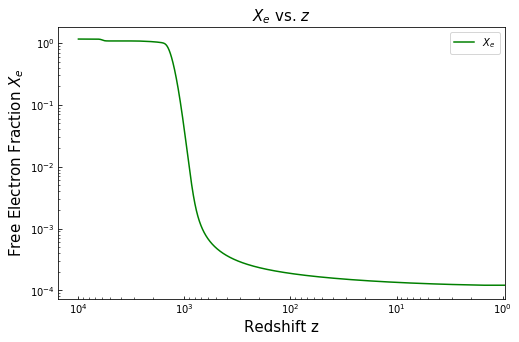

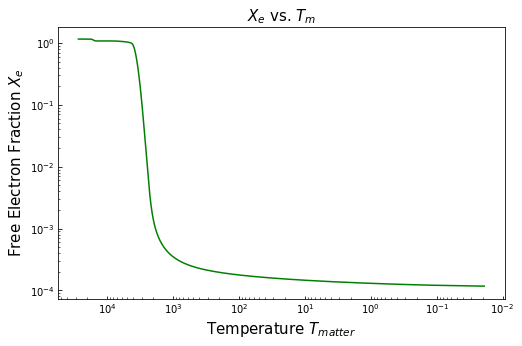

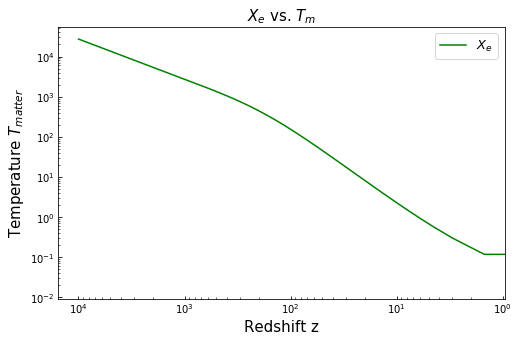

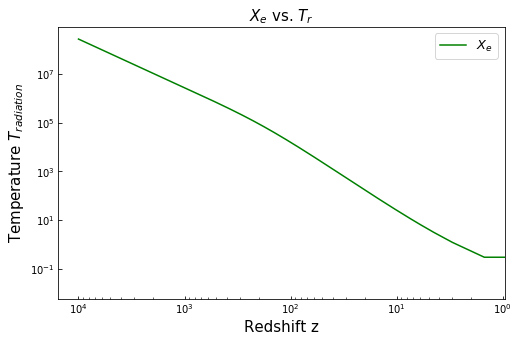

In [2]:
from recfast4py import recfast
import numpy as np
import matplotlib.pyplot as plt

Yp = 0.24    # helium mass fraction 
T0 = 2.725    # Temperature of CMB at z=0

Om = 0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=0, npz=3000, zstart=10000, zend=0)

zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)

plt.figure(figsize=(8, 5))
plt.plot(zarr,Xe,'g',label='$X_e$')
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.legend(loc='best')
plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(TM,Xe,'g',label='$X_e$')
plt.title("$X_e$ vs. $T_m$",fontsize=15)
plt.xlabel("Temperature $T_{matter}$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.show()

plt.figure(figsize=(8, 5))
# plt.plot(TM*(1+zarr),Xe,'g',label='$X_e$')
plt.plot(zarr,TM,'g',label='$X_e$')
plt.title("$X_e$ vs. $T_m$",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.legend(loc='best', fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.show()

plt.figure(figsize=(8, 5))
# plt.plot(TM*(1+zarr),Xe,'g',label='$X_e$')
plt.plot(zarr,TM*(1+zarr),'g',label='$X_e$')
# plt.xticks([1e-1,1e1,1e3,1e5,1e7],('$10^{-1}$','$10^{1}$','$10^{3}$','$10^{5}$','$10^{7}$'), fontsize=13)
# plt.yticks([0.001,0.01,0.1,1],('$10^{-3}$','$10^{-2}$','$10^{-1}$','1'), fontsize=13)
plt.title("$X_e$ vs. $T_r$",fontsize=15)
plt.ylabel("Temperature $T_{radiation}$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.legend(loc='best', fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.show()

***
### 实现双重坐标 twiny() 以及 对数刻度 xscale('log')
**重要函数**
> 对数坐标：  
>>+ `plt.xscale('log')`&emsp;&emsp;# x轴改为对数坐标，并有刻度     
>>+ `plt.loglog()`&emsp;&emsp;# 直接画图为log图

> 翻转坐标轴【反转坐标轴】   
>>+ `plt.gca().invert_xaxis()`&emsp;&emsp;# 反转x坐标轴 
>>+ `plt.xlim(100,0)`&emsp;&emsp;# 直接将坐标轴范围颠倒

> 双坐标轴，共用一个坐标轴
>>+ `plt.twiny()`&emsp;&emsp;# 共用一个y轴，上下两个x轴

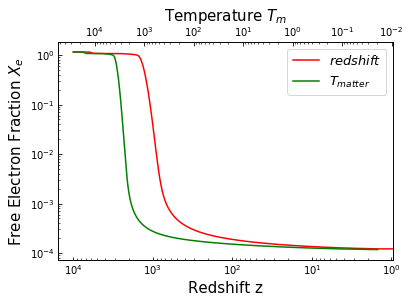

In [4]:


# plt.figure(figsize=(8, 5))
ax1, = plt.plot(zarr,Xe,'r',label='$redshift$')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(which='both',direction='in')
plt.gca().invert_xaxis()
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
# plt.legend(loc='best', fontsize=13)
# plt.show()
plt.twiny()
# ax2, = plt.plot((TM/2.725-1)/(10**4*1.6/1.38),Xe,'g',label='$T_{matter}$')
ax2, = plt.plot(TM,Xe,'g',label='$T_{matter}$')
plt.xscale('log')
plt.tick_params(which='both',direction='in')
plt.gca().invert_xaxis()
plt.legend(handles = [ax1,ax2],loc='best', fontsize=13)

plt.xlabel("Temperature $T_m$",fontsize=15)
plt.show()

***
### $T_m$不是简单的$T_m=T_{cmb}*(1+z)$
+ 返回值TM就是$T_m$   
+ 先给一个初值，然后求解微分方程得到真正的$T_{matter}$   
+ 以下是TM与$T_{cmb}(1+z)$对比图

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from recfast4py import recfast
# Recfast: compute 
Yp = 0.24    # ???
T0 = 2.725    # Temperature of CMB at z=0

Om = 0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=1, npz=5000, zstart=10000, zend=0)
zarr = np.array(zarr)
Xe = np.array(Xe)
TM = np.array(TM)

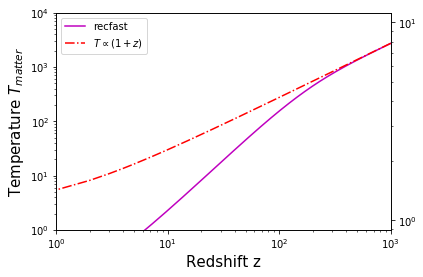

In [52]:
# Plot
# plt.scatter(zarr,TM,marker = 'x', color = 'm', label='recfast', s = 10)
plt.plot(zarr,TM,'m-', label='recfast')
# plt.plot(zarr,(1+zarr)*2.725,color='red', label='$T\propto(1+z)$')
a=np.linspace(0,2000,2000)
# plt.scatter(a,(1+a)*2.725,color='red', marker = 'x',label='$T\propto(1+z)$')
plt.plot(a,(1+a)*2.725,color='red', linestyle='-.',label='$T\propto(1+z)$')# marker = '.',
# plt.loglog(a,a+10,color='red', linestyle='-',label='$T\propto(1+z)$')# marker = '.',
# plt.gca().invert_xaxis()
plt.yscale('log')
plt.xscale('log')

plt.xlim(1,1000)
plt.ylim(1,10000)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.legend(loc='best')
plt.twinx()
# plt.ylim(1,10000)
plt.yscale('log')
plt.show()

## 导出数据 ($z,Xe_H,Xe_{He},Xe,T_{matter}$) [pandas结构]

In [17]:
import numpy as np    # 数组操作
import pandas as pd    # numpy加强版
from recfast4py import recfast

# 参数设定
Yp = 0.24    # ???
T0 = 2.725    # Temperature of CMB at z=0
Om = 0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0
# 使用 recfast
zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=1, npz=6666, zstart=10000, zend=0)
# 将结果转为 numpy
zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)
# 构造字典
data = {'redshift':zarr,
        'Xe_H':Xe_H,
        'Xe_He':Xe_He,
       'Xe':Xe,
       'T_matter':TM}
# 转换为 pandas 数组
df = pd.DataFrame(data,columns=['redshift','Xe_H','Xe_He','Xe','T_matter'])
# 打印检查
print(df)

# 导出文件
# df.to_csv('recfast_z_XeH_XeHe_Xe_Tm.csv',index=1,header=1)# 保存行名，列名

          redshift      Xe_H         Xe_He        Xe      T_matter
0     10000.000000  1.000000  7.951339e-02  1.159027  27252.725000
1      9990.000000  1.000000  7.951339e-02  1.159027  27225.475000
2      9980.000000  1.000000  7.951339e-02  1.159027  27198.225000
3      9970.000000  1.000000  7.951339e-02  1.159027  27170.975000
4      9960.000000  1.000000  7.951339e-02  1.159027  27143.725000
5      9950.000000  1.000000  7.951339e-02  1.159027  27116.475000
6      9940.000000  1.000000  7.951339e-02  1.159027  27089.225000
7      9930.000000  1.000000  7.951339e-02  1.159027  27061.975000
8      9920.000000  1.000000  7.951339e-02  1.159027  27034.725000
9      9910.000000  1.000000  7.951339e-02  1.159027  27007.475000
10     9900.000000  1.000000  7.951339e-02  1.159027  26980.225000
11     9890.000000  1.000000  7.951339e-02  1.159027  26952.975000
12     9880.000000  1.000000  7.951339e-02  1.159027  26925.725000
13     9870.000000  1.000000  7.951339e-02  1.159027  26898.47

## 最终版本
***
### 普通版本【未定义函数】

In [1]:
from recfast4py import recfast
import numpy as np
import matplotlib.pyplot as plt

Yp = 0.24    # ???
T0 = 2.725    # Temperature of CMB at z=0

Om = 1#0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 1.14    # fudge-factor
fDM = 0.0    # fDM [eV/s] which gives annihilation efficiency

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=1, npz=3000, zstart=10000, zend=0.)

zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)

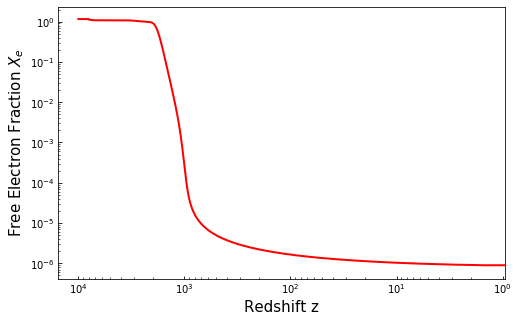

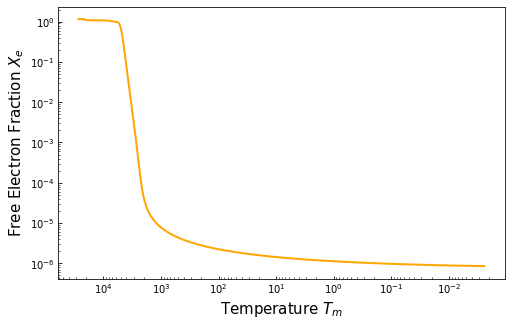

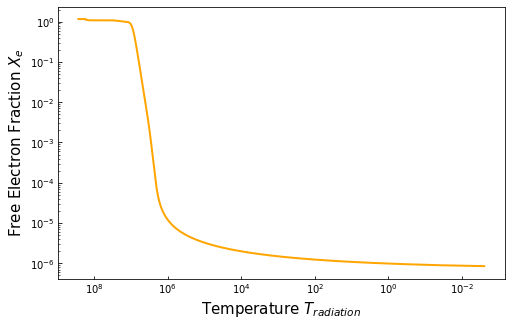

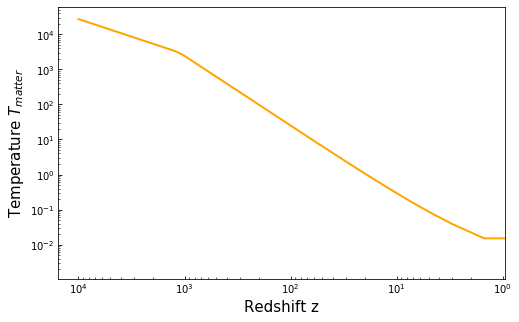

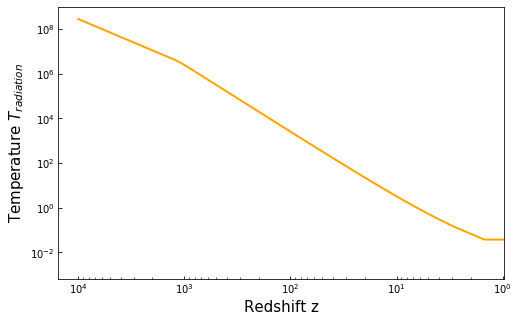

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(zarr,Xe,'r-',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(TM,Xe,linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Temperature $T_m$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(TM*(1+zarr),Xe,linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Temperature $T_{radiation}$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(zarr,TM,linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(zarr,TM*(1+zarr),linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{radiation}$",fontsize=15)
plt.show()

# # 导出图片【矢量图】
# plt.savefig(fname="./tmp_storage/lalala",format="eps")

***

#### $X_e$ vs. $z$
由于我们在画log图时，靠近0处会有明显的曲率变化
> 例如：y=x+1，在普通坐标系下和log图中，有明显不同。在靠近0时，变得非常平缓   
>> 基于此，如果我们想要查看0~1范围内详细情况（放大0~1区间），可以画成 log(x+1)图，如果想要放大 (0,2) 区间，那就画 log(x+2) 图   

所以我们只将红移下限设定到1

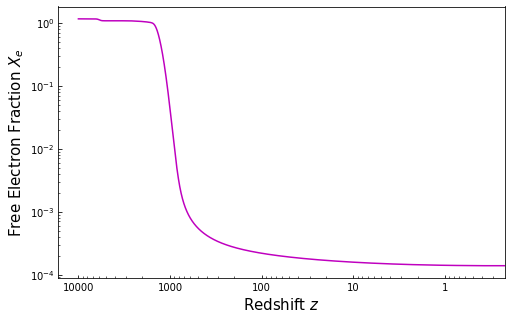

In [5]:
from recfast4py import recfast
import numpy as np
import matplotlib.pyplot as plt

Yp = 0.24    # helium mass fraction 
T0 = 2.725    # Temperature of CMB at z=0

Om = 0.268    # matter
Ob = 0.052#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, 
                                            switch=0, npz=10000, zstart=10000, zend=0)

zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)
################################################################
plt.figure(figsize=(8, 5))
plt.plot(zarr,Xe,'m-',label='$redshift$')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(which='both',direction='in')
plt.gca().invert_xaxis()
# plt.title("recfast")
plt.xlabel("Redshift $z$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
# plt.xticks([1,10,100,1000],('1','10','100','1000'))#, fontsize=13)
plt.xticks([1,10,100,1000,10000],('1','10','100','1000','10000'))#, fontsize=13)
# 导出图片【矢量图】
plt.savefig(fname="./tmp_storage/recfast_Xe_z.eps",format="eps")

plt.show()

***

#### $T_{m}$ vs. $z$ 
$T_m=T_{\gamma}=T_e$
> 在recfast中，物质温度(matter temperature)和辐射温度(radiation temperature)是相同的
>> 根据论文[(Jens Chluba et al. 2015)](https://arxiv.org/abs/1503.04827)
可以知道，recfast事实上在计算时，认为这几个温度是相同的，从而造成了一定的误差。

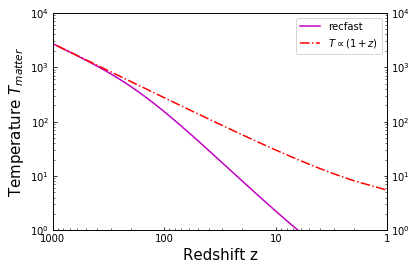

In [11]:
# Plot
# fig, ax = plt.subplots(figsize=(8, 3))
plt.plot(zarr,TM,'m-', label='recfast')
a=np.linspace(0,2000,2000)
plt.plot(a,(1+a)*2.725,color='red', linestyle='-.',label='$T\propto(1+z)$')# marker = '.',
plt.xticks([1,10,100,1000],('1','10','100','1000'))
plt.yticks([1,10,100,1000,10000],('1','10','100','1000','10000'))
plt.tick_params(which='both',direction='in')
plt.yscale('log')
plt.xscale('log')

plt.xlim(1,1000)
plt.ylim(1,10000)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.legend(loc='best')
plt.twinx()
plt.xticks([1,10,100,1000],('1','10','100','1000'))#, fontsize=13)
plt.yticks([1,10,100,1000,10000],('1','10','100','1000','10000'))#, fontsize=13)
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.ylim(1,10000)
plt.yscale('log')

# 导出图片【矢量图】
# plt.savefig(fname="./tmp_storage/recfast_Tm_z.eps",format="eps")

plt.show()

### 函数版本【方便使用和迁移使用，模块化】